# Train sizing
---------------------------------

This example shows how to asses a model's performance based on the size of the training set.

The data used is a variation on the Australian weather dataset from https://www.kaggle.com/jsphyg/weather-dataset-rattle-package. The goal of this dataset is to predict whether or not it will rain tomorrow training a binay classifier on target RainTomorrow.

## Load the data

In [1]:
# Import packages
import numpy as np
import pandas as pd
from atom import ATOMClassifier

In [2]:
# Load the Australian weather dataset
X = pd.read_csv('./datasets/weatherAUS.csv')

# Let's have a look at a subset of the data
X.sample(frac=1).iloc[:5, :8]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed
10829,CoffsHarbour,2.1,17.7,0.0,NaN,NaN,NaN,NaN
15108,Newcastle,20.2,29.7,0.0,NaN,NaN,NaN,NaN
117467,PerthAirport,11.7,20.5,0.4,6.0,8.4,WSW,57.0
80685,Dartmoor,-0.8,15.3,0.0,1.8,7.2,WSW,24.0
122490,SalmonGums,8.6,21.2,0.0,NaN,NaN,NW,67.0


## Run the pipeline

In [3]:
# Initialize ATOM and prepare the data
atom = ATOMClassifier(X, verbose=2, random_state=1)
atom.clean()
atom.impute(strat_num='median', strat_cat='most_frequent', min_frac_rows=0.8)
atom.encode()

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ================== >>
Shape: (142193, 22)
Missing values: 316559
Categorical columns: 5
Scaled: False
-----------------------------------
Train set size: 113755
Test set size: 28438
-----------------------------------
Dataset balance: No:Yes <==> 3.5:1.0
-----------------------------------
Distribution of classes:
|     |   dataset |   train |   test |
|:----|----------:|--------:|-------:|
| No  |    110316 |   88263 |  22053 |
| Yes |     31877 |   25492 |   6385 |

Applying data cleaning...
 --> Label-encoding the target column.
Fitting Imputer...
Imputing missing values...
 --> Dropping 15182 rows for containing less than 80% non-missing values.
 --> Imputing 100 missing values with median in feature MinTemp.
 --> Imputing 57 missing values with median in feature MaxTemp.
 --> Imputing 640 missing values with median in feature Rainfall.
 --> Imputing 46535 missing values with medi

In [4]:
# We can analyze the impact of the training set's size on a LightGBM model
atom.train_sizing('lgb', train_sizes=np.linspace(0.1, 1, 9), bagging=4)


Training ===================================== >>
Models: LGB
Metric: f1


Run: 0 ================================ >>
Size of training set: 10164 (10%)
Size of test set: 25366


Results for LightGBM:         
Fit ---------------------------------------------
Train evaluation --> f1: 0.8175
Test evaluation --> f1: 0.6109
Time elapsed: 0.715s
Bagging -----------------------------------------
Evaluation --> f1: 0.5928 ± 0.0033
Time elapsed: 1.566s
-------------------------------------------------
Total time: 2.291s


Final results ========================= >>
Duration: 2.293s
------------------------------------------
LightGBM --> f1: 0.593 ± 0.003 ~


Run: 1 ================================ >>
Size of training set: 21599 (21%)
Size of test set: 25366


Results for LightGBM:         
Fit ---------------------------------------------
Train evaluation --> f1: 0.7398
Test evaluation --> f1: 0.6248
Time elapsed: 0.950s
Bagging -----------------------------------------
Evaluation --> f1: 0.61

## Analyze the results

In [5]:
# Note that the results dataframe now is multi-index
atom.results

,,metric_train,metric_test,time_fit,mean_bagging,std_bagging,time_bagging,time
frac,model,,,,,,,
0.100,LGB,0.817545,0.610896,0.715s,0.592843,0.00326925,1.566s,2.291s
0.213,LGB,0.739836,0.624805,0.950s,0.615899,0.00419954,2.027s,2.979s
0.325,LGB,0.703472,0.631394,1.166s,0.620782,0.00276679,2.432s,3.599s
0.438,LGB,0.686179,0.631308,1.304s,0.627692,0.00471833,3.011s,4.316s
0.550,LGB,0.680266,0.639622,1.643s,0.6277,0.00435635,3.521s,5.165s
0.662,LGB,0.677,0.638232,1.928s,0.636536,0.00181403,4.042s,5.970s
0.775,LGB,0.675226,0.639803,2.085s,0.63298,0.00338554,4.610s,6.697s
0.888,LGB,0.66932,0.639532,2.356s,0.634824,0.00334286,5.087s,7.444s
1.000,LGB,0.664209,0.639555,2.552s,0.638334,0.00110171,5.604s,8.158s


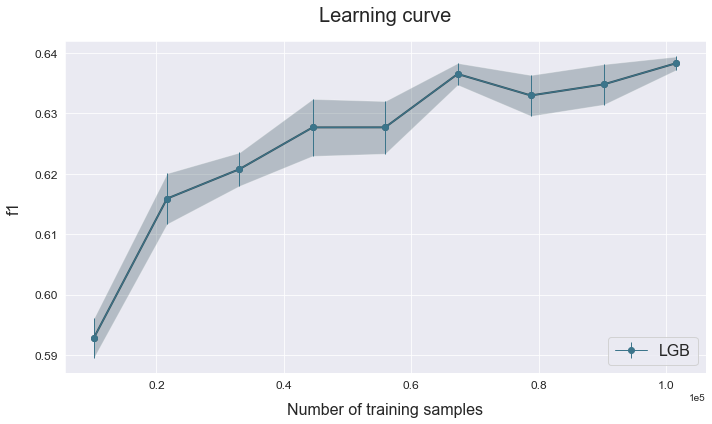

In [6]:
# Plot the train sizing's results
atom.plot_learning_curve()